# Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [3]:
df= pd.read_csv('Lligues europees UEFA.csv',sep=';',encoding='latin-1')

In [4]:
df.head(10)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
5,6,Milan,ITA,1,37,25,8,4,66,31,...,83,2.24,60.0,34.4,25.6,0.69,W W W W W,42388,Rafael Leão - 11,Mike Maignan
6,7,Inter,ITA,2,37,24,9,4,81,32,...,81,2.19,78.1,38.2,39.9,1.08,W L W W W,41995,Lautaro Martínez - 21,Samir Handanovi?
7,8,Napoli,ITA,3,37,23,7,7,71,31,...,76,2.05,58.5,29.9,28.6,0.77,D L W W W,26681,Victor Osimhen - 14,David Ospina
8,9,Dortmund,GER,2,34,22,3,9,85,52,...,69,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland - 22,Gregor Kobel
9,10,Barcelona,ESP,2,37,21,10,6,68,36,...,73,1.97,61.3,35.2,26.1,0.71,L W W W D,53933,Memphis Depay - 12,Marc-André ter Stegen


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

- **Veiem que tenim 21 variables, 5 no númeriques, 98 dades i cap nul.**



- **Expliquem cada variable del dataframe**:**Rk** : Club Ranking **Squad** : Squad name **Country** : country of squad **LgRk** : Club rankig in local league **MP** : matches played **W** : win matches **L** : Loss matches **D** : Draw matches (D = W - L) **GF** : Goals for **GA** : Goals against **GD** : Goals difference (GD = GF - GA) **Pts** : number of points **Pts/G** : points per match played **xG** : the probability of a shot resulting in a goal **xGA** : the probability of an attempt against resulting in a goal **xGD** : xGA - xGA **xGD/90** : expected goal difference per 90 minute **Attendance** : max number of attendance **Top Team Scorer** : top team scorer name and number of goals **Goalkeeper** : goalkeeper name


- **Fem una anàlisi estadística:**

In [6]:
df.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


Veiem que no totes les variables estan mesurades amb la mateixa escala.

In [7]:


from scipy import stats

shapiro_test = stats.shapiro(df['GD'])
shapiro_test

print('Hipotesis nula Ho : La mostra té una distribució normal')
print('Hipotesis alternativa H1 : La mostra no té una distribució normal\n\n')

if shapiro_test.pvalue>0.05:
    print('No podem rebutjar hipotesis nula')
    print('La mostra té una distribució normal')
else:
    print("Podem rebutjar l'hipotesis nula")
    print('La mostra no té una distribució normal')



Hipotesis nula Ho : La mostra té una distribució normal
Hipotesis alternativa H1 : La mostra no té una distribució normal


No podem rebutjar hipotesis nula
La mostra té una distribució normal


# Exercici 2

Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

**Hipotesis nulla**: No hi ha relació entre el rànquing i la diferència de gols\
**Hipotesis alternativa**: Hi ha  relació entre el rànquing i la diferència de gols.

En tenir dos variables numèriques, fem un test de correlació de Pearson:

In [8]:
# Test de Correlació de Pearson
from scipy.stats import pearsonr
stat, p = pearsonr(df['Rk'], df['GF'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print(' No hi ha relació entre el rànquing i la diferència de gols')
else:
 print(' Hi ha relació entre el rànquing i la diferència de gols')

stat=-0.855, p=0.000
 Hi ha relació entre el rànquing i la diferència de gols


In [9]:
golesvsrk=df[['Rk','GD']]
golesvsrk

,Rk,GD
0,1,72
1,2,65
2,3,49
3,4,60
4,5,49
...,...,...
93,94,-41
94,95,-35
95,96,-42
96,97,-56


- **Comprovem gràficament aquesta relació i veiem també la distribució de cada variable:**

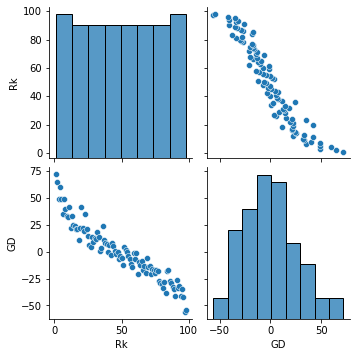

In [10]:
sns.pairplot(golesvsrk)

# Exercici 3

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [11]:

# Friedman Test
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(df['GF'], df['GD'], df['GA'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablement tenen la mateixa distribució')
else:
 print('Probablement tenen diferents distribucions')

stat=119.573, p=0.000
Probablement tenen diferents distribucions


In [12]:
goles= df[['GD','GF','GA']]
goles

,GD,GF,GA
0,72,96,24
1,65,89,24
2,49,80,31
3,60,97,37
4,49,85,36
...,...,...,...
93,-41,48,89
94,-35,34,69
95,-42,33,75
96,-56,23,79


- **Comprovem gràficament la distribució de cada variable i també la relació entre elles:**

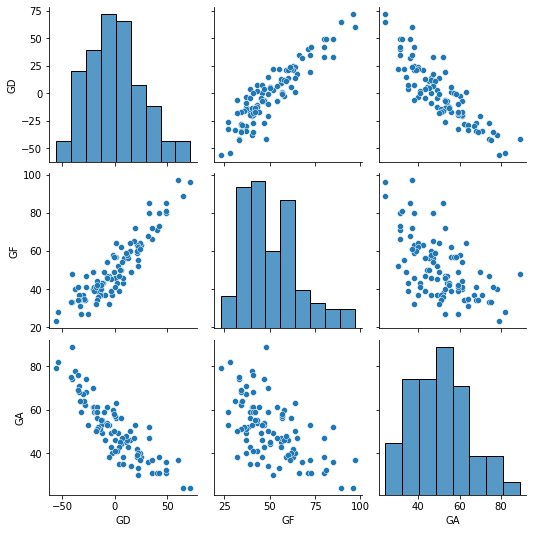

In [13]:
sns.pairplot(goles)